# Analyzing 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

%config InlineBackend.figure_format='retina'
warnings.simplefilter(action='ignore', category=FutureWarning)

from grid2vec.grid import load_grid

grid = load_grid("../../data/grid_planning_scenario/")

In [18]:
df_results = (
    pd.read_csv(
        "../../data/grid_planning_scenario/powerflow_analysis/nminus1_dc/overloads_with_trafos.csv"
    )
    .sort_values("step")
    .reset_index(drop=True)
)
df_results.head()

,vec_env,step,nminus1_failure_type,nminus1_failure_id,overloaded_element_type,overloaded_element_id,loading_value
0,0,0,line,1036,trafo3w,336,115.972527
1,0,0,line,1093,trafo3w,387,103.760109
2,0,0,line,1093,trafo3w,382,93.392395
3,0,0,line,1093,trafo3w,375,112.708641
4,0,0,line,1093,trafo3w,360,93.392395


In [28]:
df_results = df_results[df_results['loading_value'] > 100]

df_results_lines = df_results[df_results['overloaded_element_type'] == 'line']
df_results_trafos = df_results[df_results['overloaded_element_type'] == 'trafo']
df_results_trafos3w = df_results[df_results['overloaded_element_type'] == 'trafo3w']

In [26]:
# check if every step has an overload
df_results_lines.sort_values("step", inplace=True)
df_results_lines.step.is_monotonic_increasing

True

Text(0.5, 1.0, 'Number of overloads across all nminus1 outages per step')

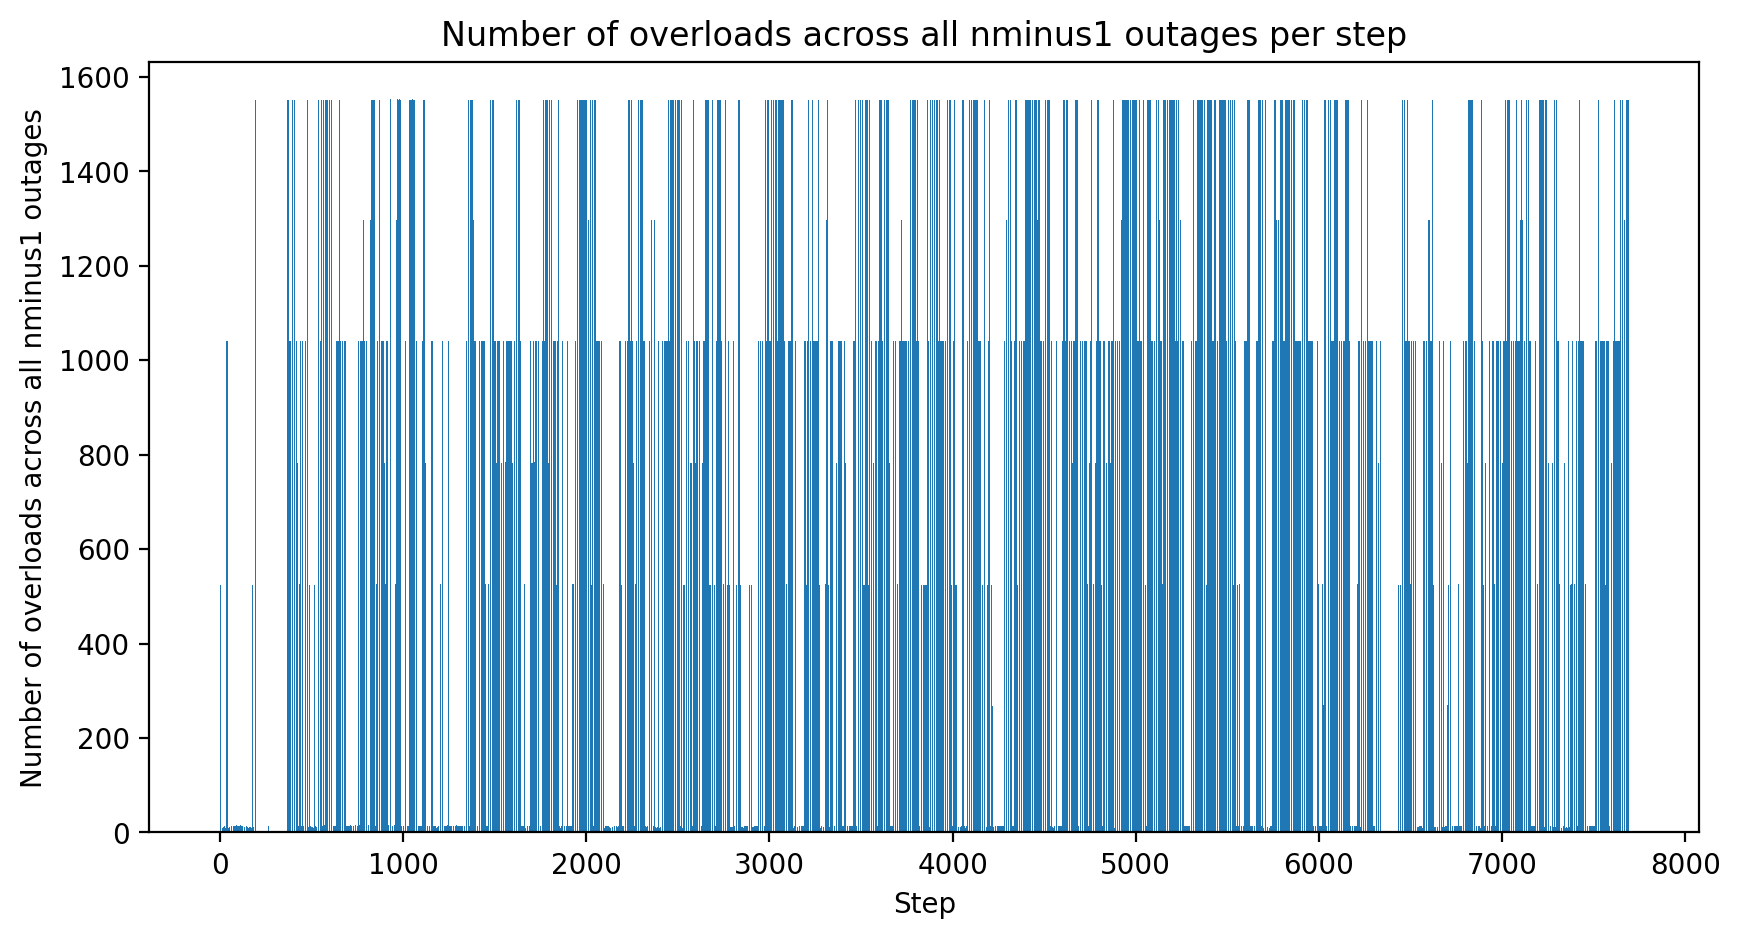

In [27]:
outages_per_step = df_results_lines.groupby("step")['nminus1_failure_id'].count()

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(outages_per_step.index, outages_per_step.values, color='C0')
ax.set_xlabel("Step")
ax.set_ylabel("Number of overloads across all nminus1 outages")
ax.set_title("Number of overloads across all nminus1 outages per step")

Text(0, 0.5, 'Number of steps')

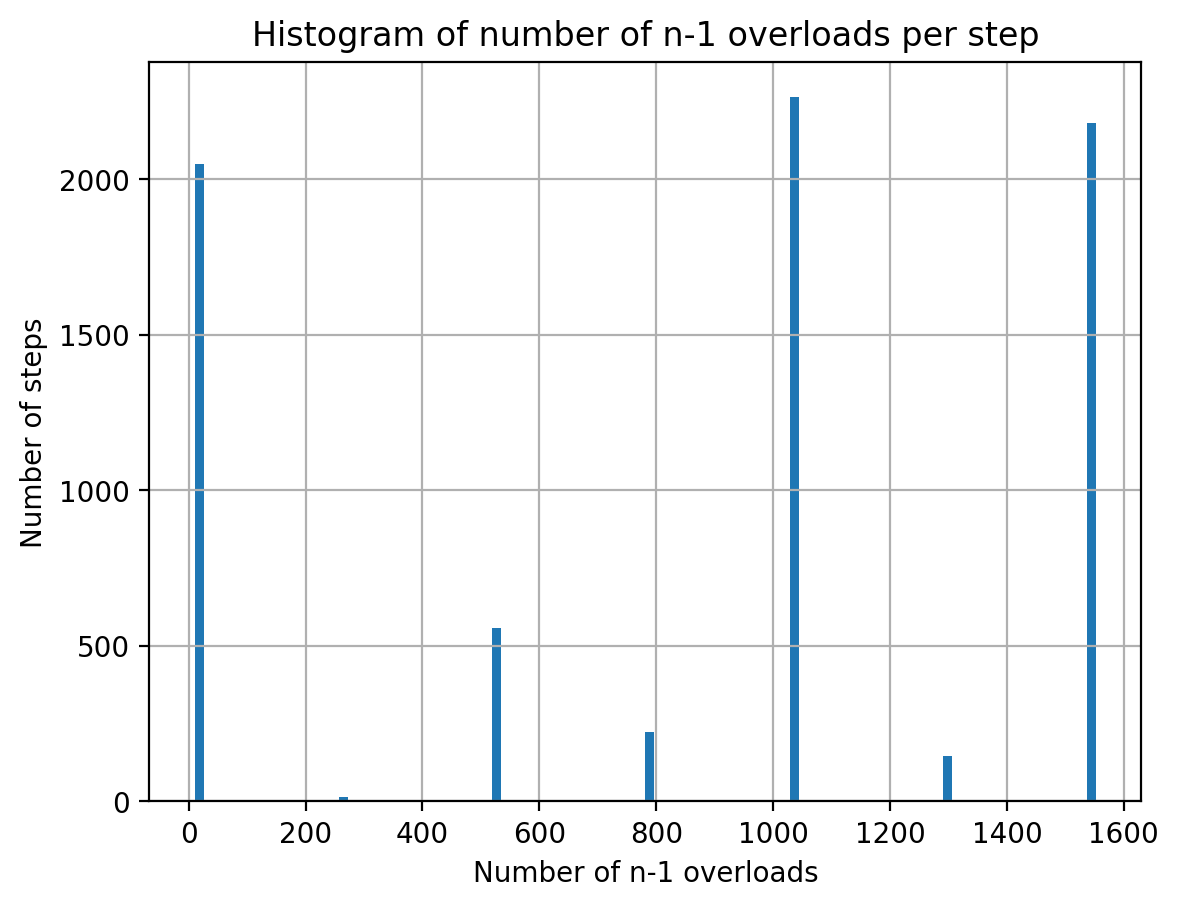

In [29]:
df_results_lines.groupby("step")[['nminus1_failure_id']].count().hist(bins=100)
plt.title("Histogram of number of n-1 overloads per step")
plt.xlabel("Number of n-1 overloads")
plt.ylabel("Number of steps")

Text(0, 0.5, 'Number of occurrences')

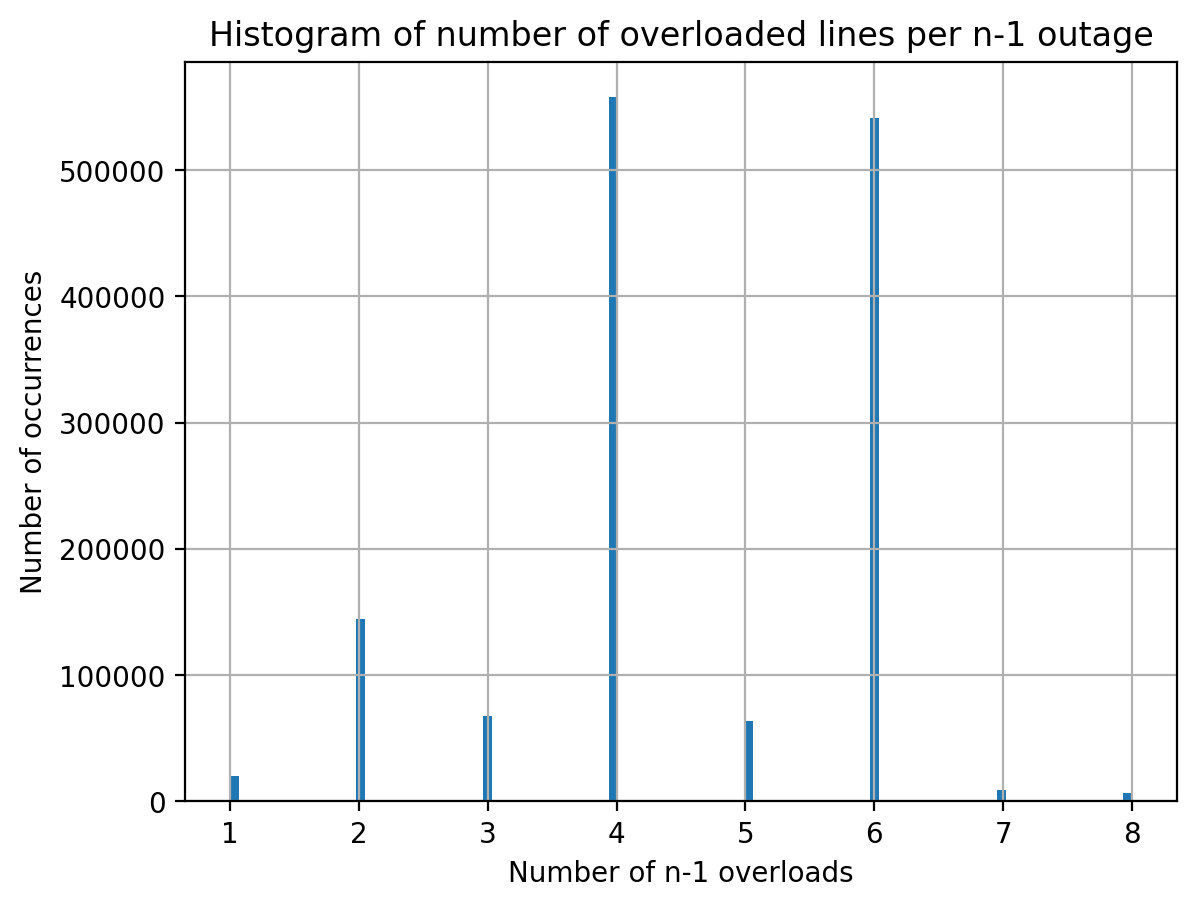

In [32]:
df_results_lines.groupby(["step", "nminus1_failure_id"])[['overloaded_element_id']].count().hist(bins=100)
plt.title("Histogram of number of overloaded lines per n-1 outage")
plt.xlabel("Number of n-1 overloads")
plt.ylabel("Number of occurrences")

In [50]:
# most overloaded elements - relatively small number
# TODO: check N-0 case
# Redispatch optimization 
pd.DataFrame(df_results_lines['overloaded_element_id'].value_counts()).join(grid.net.line[["from_bus", "to_bus"]])

,count,from_bus,to_bus
overloaded_element_id,,,
1098,1295654,2317,2319
1099,1293350,2317,2320
1103,1238704,2318,2317
1102,1181315,2318,2317
1145,690000,2318,1849
1144,651088,2318,1849
1119,14868,2486,2327
1120,14868,2486,2329
1128,14868,2487,2351


<Axes: >

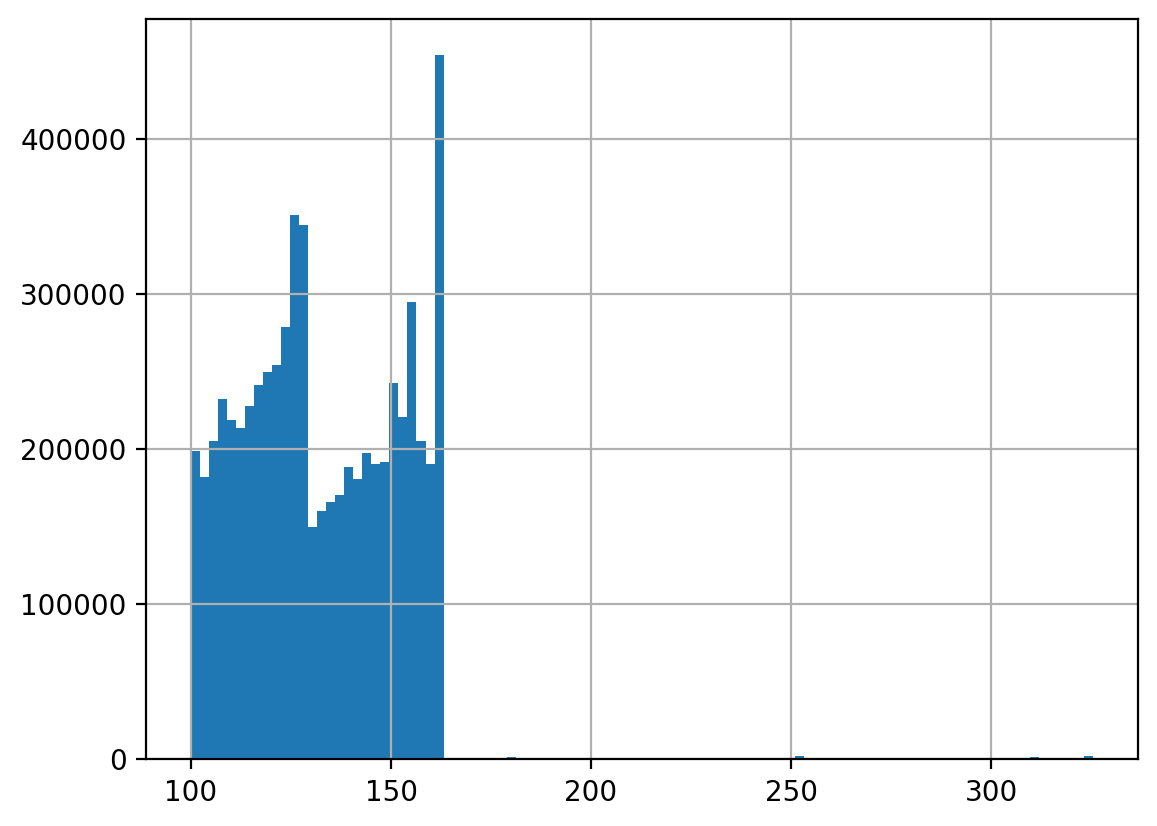

In [51]:
# here we have quite a mixture of overload values
df_results_lines['loading_value'].hist(bins=100)

<Axes: >

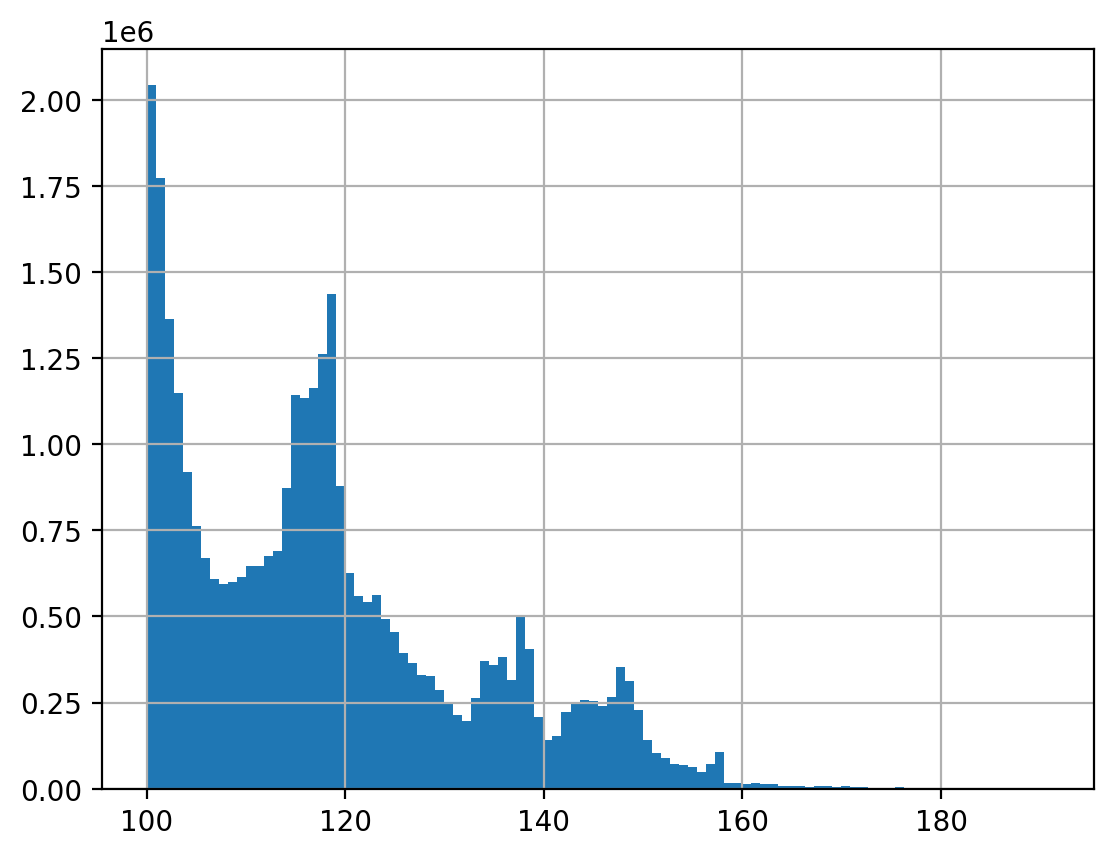

In [52]:
df_results_trafos3w['loading_value'].hist(bins=100)

In [53]:
avg_num_overloaded_lines_per_nminus1 = (
    df_results_lines.groupby(["step", "nminus1_failure_id"])[["overloaded_element_id"]]
    .count()
    .reset_index()
    .groupby("nminus1_failure_id")[["overloaded_element_id"]]
    .mean()
    .sort_values("overloaded_element_id", ascending=False)
    .join(grid.net.line[["from_bus", "to_bus"]])
    .rename(columns={"overloaded_element_id": "average number of other lines overloaded on n-1 outage"})
)
avg_num_overloaded_lines_per_nminus1.head(20)

,average number of other lines overloaded on n-1 outage,from_bus,to_bus
nminus1_failure_id,,,
1119,5.317326,2486,2327
1120,5.317326,2486,2329
1128,5.317326,2487,2351
888,4.580423,2011,1871
1126,4.580423,2341,2359
1107,4.580423,1933,1847
1108,4.580423,1887,1883
1109,4.580423,2144,2297
1110,4.580423,1899,2144
